# Basic EDA on Raw Data
Basic EDA on raw data i.e. dataset size, image format, image size etc.

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torchvision
import random
import torch
from PIL import Image, ImageOps

### Dataset details
First we check the size of the dataset, here with 30,000 images and masks. This can be further split up into train/validation/test split on a 80%/10%/10% basis. This is done using the split_folders package, in `src/data/data_preprocess.py`

In [2]:
raw_img = "../data/raw/CelebAMask-HQ/CelebA-HQ-img/"

imgfiles = next(os.walk(raw_img))[2]
print(len(imgfiles))

30000


### Image format
Images in jpg format <br />
Annotations in png format

### Image size
Now, viewing and checking the size of a few of the images and masks.

Image shape :  (1024, 1024, 3)


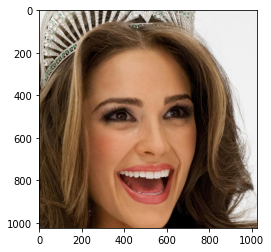

In [3]:
sample_path = "../data/raw/CelebAMask-HQ/CelebA-HQ-img/0.jpg"

sample_img = cv2.imread(sample_path)
sample_img_inp = cv2.cvtColor(sample_img, cv2.COLOR_RGB2BGR)
print('Image shape : ', np.shape(sample_img_inp))

plt.imshow(sample_img_inp)

Hence, images are of 1024x1024 size.

Annotation Categories for masks:
* hair
* left brow
* right brow
* left eye
* right eye
* nose
* lower lip
* upper lip
* neck
* skin
* mouth
* left ear
* right ear
* cloth

All these categories masks for the first image has been displayed in the cell below.

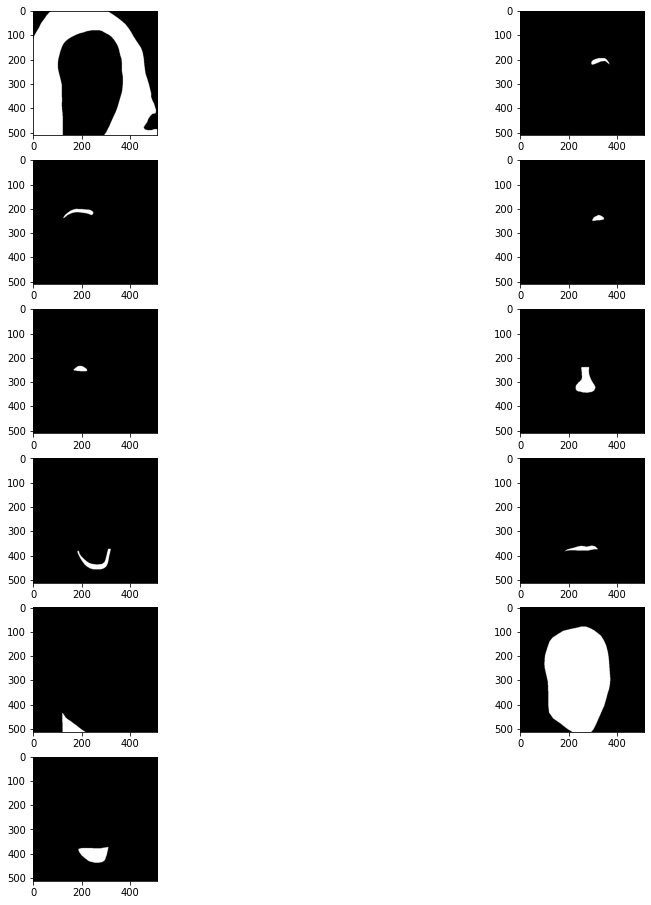

In [4]:
sample_path_ann = "../data/raw/CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/00000_"
categories = [
    'hair.png',
    'l_brow.png',
    'r_brow.png',
    'l_eye.png',
    'r_eye.png',
    'nose.png',
    'l_lip.png',
    'u_lip.png',
    'neck.png',
    'skin.png',
    'mouth.png',
    'l_ear.png',
    'r_ear.png',
    'cloth.png'
]
fig = plt.figure(figsize=(16, 16))
rows = 6
columns = 2
i = 1

for cat in categories:
    path = sample_path_ann + cat
    if not os.path.exists(path):
        continue
    sample_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    fig.add_subplot(rows, columns, i)
    i = i + 1
    plt.imshow(sample_img, 'gray')
plt.show()

In [5]:
print("Annotation shape : ", np.shape(sample_img))

Annotation shape :  (512, 512)


Hence, masks are of shape 512x512

### Processing mask categories
Since, in this project it is required to predict a mask for face portraits, hence all categories of masks need to be combined to obtain the required ground truth masks.<br />
This has been done in the next cell in the function `get_combined_ann`

Annote shape :  (512, 512)


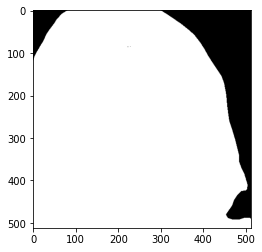

In [6]:
def get_combined_ann(root, categories):
    combined_ann = np.zeros(np.shape(sample_img)).astype(np.uint8)
    for cat in categories:
        path = root + cat
        if not os.path.exists(path):
            continue
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        combined_ann = cv2.add(combined_ann, img)
    return combined_ann

combined_ann = get_combined_ann(sample_path_ann, categories)
print("Annote shape : ", np.shape(combined_ann))
plt.imshow(combined_ann, 'gray')

Combining masks with original image gives the portrait cut out from the background

### Resizing and Combiining Image and Masks
Since input in of size 1024 x 1024 and mask of size 512 x 512, the input image is downsized to size of mask

(512, 512, 3)


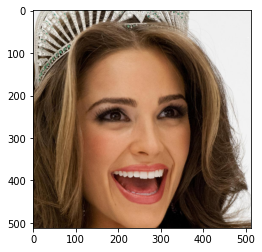

In [7]:
sample_img_inp = cv2.resize(sample_img_inp, (512, 512))
print(np.shape(sample_img_inp))
sample_img_inp.astype(np.uint8)

plt.imshow(sample_img_inp)

Image and masks are combined using openCV `bitwise_and` function

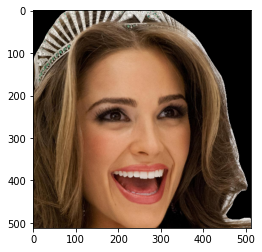

In [8]:
fin_image = cv2.bitwise_and(sample_img_inp, sample_img_inp, mask = combined_ann)
plt.imshow(fin_image)

Similarly, for another sample image and mask

Image shape :  (512, 512, 3)


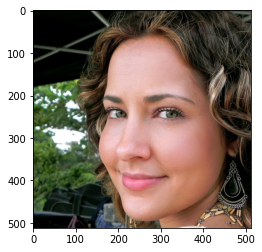

In [9]:
sample_path = "../data/raw/CelebAMask-HQ/CelebA-HQ-img/2.jpg"
img = cv2.imread(sample_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = cv2.resize(img, (512, 512))
print("Image shape : ", np.shape(img))
plt.imshow(img)

Annote shape :  (512, 512)


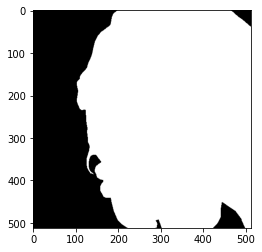

In [10]:
sample_path_ann = "../data/raw/CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/00002_"

combined_ann = get_combined_ann(sample_path_ann, categories)
print("Annote shape : ", np.shape(combined_ann))
plt.imshow(combined_ann, 'gray')

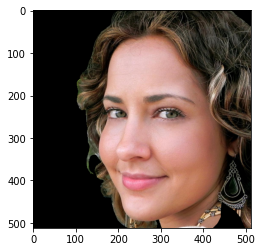

In [11]:
fin_image = cv2.bitwise_and(img, img, mask = combined_ann)

plt.imshow(fin_image)

### Modify image and mask
Now, resizing image and masks to 224x224 for a more efficient usage of VRAM and also, to make it compatible with pretrained DeepLabv3 model.

Image shape :  (512, 512, 3)
Small image shape :  (224, 224, 3)


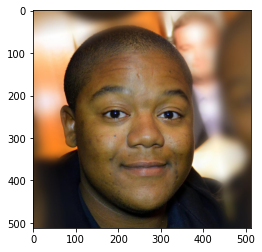

In [12]:
sample_path = "../data/raw/CelebAMask-HQ/CelebA-HQ-img/10.jpg"
img = cv2.imread(sample_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_small = cv2.resize(img, (224, 224))
img = cv2.resize(img, (512, 512))
print("Image shape : ", np.shape(img))
print("Small image shape : ", np.shape(img_small))
plt.imshow(img)

Annote shape :  (512, 512)
Annote(small) shape :  (224, 224)


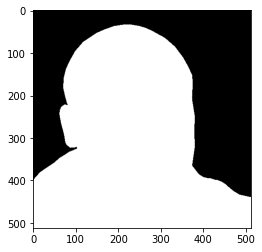

In [13]:
sample_path_ann = "../data/raw/CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/00010_"

combined_ann = get_combined_ann(sample_path_ann, categories)
combined_ann_small = cv2.resize(combined_ann, (224, 224))
print("Annote shape : ", np.shape(combined_ann))
print("Annote(small) shape : ", np.shape(combined_ann_small))
plt.imshow(combined_ann, 'gray')

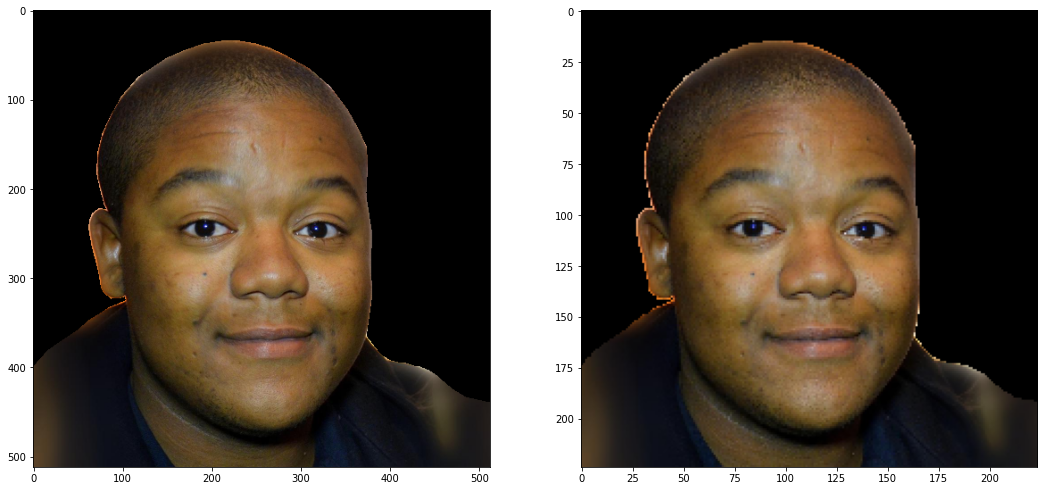

In [14]:
fin_image_large = cv2.bitwise_and(img, img, mask = combined_ann)
fin_image_small = cv2.bitwise_and(img_small, img_small, mask = combined_ann_small)

fig = plt.figure(figsize=(18, 18))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(fin_image_large)

fig.add_subplot(rows, columns, 2)
plt.imshow(fin_image_small)

plt.show()

On converting, to 224x224 dimensions there is no noticable loss in the segmented portrait, hence convert all raw images to size 224x224 and combine all respective masks. Also, all masks are collected under single folder as opposed to the bucketized folder structure givrn for the annotated masks.

The above code for processing of raw data has been implemented in module : `src/data/data_preprocess.py`